La base de données MNIST pour Modified ou Mixed National Institute of Standards and Technology, est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.

La reconnaissance de l'écriture manuscrite est un problème difficile, et un bon test pour les algorithmes d'apprentissage. La base MNIST est devenue un test standard1. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1. Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté1.

In [110]:
import numpy as np
import keras
from keras.models import load_model
import os
import random
import cv2  
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import pandas as pd


In [111]:

print("numpy version:", np.__version__)
print("keras version:", keras.__version__)
print("OpenCV version:", cv2.__version__)

numpy version: 1.24.3
keras version: 2.15.0
OpenCV version: 4.9.0


In [112]:
# charger les données de MNIST depuis keras
# mnist = keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [113]:
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

In [114]:
mnist_train = pd.read_csv('dataset/mnist_train.csv')
mnist_test = pd.read_csv('dataset/mnist_test.csv')

x_train = mnist_train.iloc[:, 1:].values
y_train = mnist_train.iloc[:, 0].values

x_test = mnist_test.iloc[:, 1:].values
y_test = mnist_test.iloc[:, 0].values

# reshape the data to 28x28x1

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [115]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


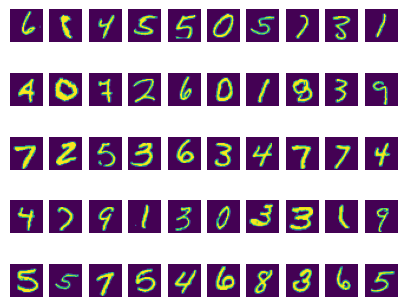

In [116]:
# afficher une image aléatoire 50 images de l'ensemble de données
fig, ax = plt.subplots(5, 10, figsize=(5, 4))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[random.randint(0, x_train.shape[0])])
    plt.axis('off')
plt.show()


In [117]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

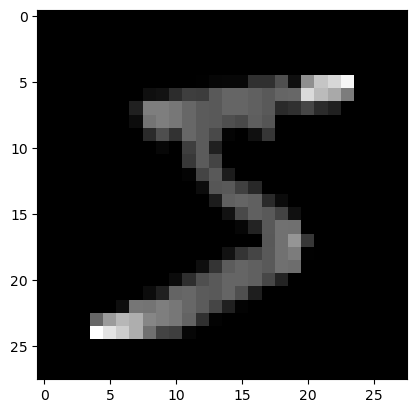

In [118]:
# normalisation des données
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
# afficher une image normalisée
plt.imshow(x_train[0], cmap=plt.cm.gray)

In [119]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [120]:
print(y_train[0])

5


In [121]:
IMG_SIZE = 28
x_train_r = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  
x_test_r = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("x_train.shape = ", x_train_r.shape)
print("x_test.shape = ", x_test_r.shape)     

x_train.shape =  (60000, 28, 28, 1)
x_test.shape =  (10000, 28, 28, 1)


In [122]:
x_train_r.shape[1:]

(28, 28, 1)

In [123]:
model = Sequential()

# 1ère couche de convolution
model.add(Conv2D(64, (3, 3), input_shape=x_train_r.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2ème couche de convolution
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3ème couche de convolution
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Connexion
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(10))
model.add(Activation('softmax'))


Le package `keras.models` et les autres modules que vous avez importés sont des composants de la bibliothèque Keras, qui est une bibliothèque open source populaire pour la création et la formation de réseaux de neurones artificiels. Voici une explication de chaque module importé :

1. `keras.models.Sequential` :
   - `Sequential` est une classe de Keras qui permet de créer des modèles séquentiels, c'est-à-dire des modèles qui sont une simple pile de couches où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie.
   - Vous pouvez ajouter des couches à ce modèle séquentiel en séquence, et Keras s'occupera de connecter automatiquement les sorties des couches précédentes aux entrées des couches suivantes.

2. `keras.layers.Conv2D` :
   - `Conv2D` est une couche de convolution 2D. Les convolutions 2D sont couramment utilisées dans le traitement d'images pour extraire des caractéristiques en parcourant une matrice d'entrée avec un petit noyau de convolution.
   - Cette couche effectue une convolution spatiale sur les entrées en utilisant un certain nombre de filtres, ce qui produit une sortie qui est généralement une carte de caractéristiques.

3. `keras.layers.MaxPooling2D` :
   - `MaxPooling2D` est une opération de regroupement (pooling) qui réduit la dimensionnalité des cartes de caractéristiques en prenant le maximum sur une fenêtre donnée (généralement de taille 2x2) pour chaque région de l'entrée.

4. `keras.layers.Flatten` :
   - `Flatten` est une couche qui sert à aplatir les entrées en un vecteur. Cela est généralement utilisé pour passer de la sortie d'une couche de convolution ou de regroupement à une couche entièrement connectée.

5. `keras.layers.Dense` :
   - `Dense` est une couche de neurones entièrement connectée. Chaque neurone dans cette couche est connecté à tous les neurones de la couche précédente.
   - Cette couche prend en charge l'activation linéaire par défaut, mais vous pouvez spécifier une fonction d'activation (comme ReLU, softmax, etc.).

6. `keras.layers.Dropout` :
   - `Dropout` est une couche de régularisation qui désactive aléatoirement un certain nombre de neurones pendant l'entraînement afin de prévenir le surajustement (overfitting).

7. `keras.layers.BatchNormalization` :
   - `BatchNormalization` est une technique de normalisation qui normalise les activations de chaque couche pour réduire la dépendance entre les paramètres d'entraînement.

8. `keras.layers.Activation` :
   - `Activation` est une couche d'activation qui applique une fonction d'activation à la sortie de la couche précédente.


La formule mathématique de ce modèle CNN peut être décomposée comme suit :

Soit $ x $ une image en entrée avec des dimensions $ (H, W, C) $, où $ H $ est la hauteur, $ W $ est la largeur et $ C $ est le nombre de canaux de couleur.

1. **1ère couche de convolution** :
   - $ f^{[1]}(x) = \text{ReLU}(b^{[1]} + \sum_{i=1}^{64} W_{i}^{[1]} * x) $, où $ * $ représente la convolution, $ W_{i}^{[1]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, C) $, $ b^{[1]} $ est le biais, et $ \text{ReLU} $ est la fonction d'activation ReLU.
   - Après cette opération, une normalisation par lots (Batch Normalization) est appliquée.

2. **Pooling** :
   - Une opération de pooling MaxPooling2D est appliquée avec une fenêtre de pool de taille $ (2, 2) $.

3. **2ème couche de convolution** :
   - $ f^{[2]}(x) = \text{ReLU}(b^{[2]} + \sum_{i=1}^{128} W_{i}^{[2]} * f^{[1]}) $, où $ W_{i}^{[2]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, 64) $, $ b^{[2]} $ est le biais, et $ f^{[1]} $ est la sortie de la première couche de convolution.
   - Encore une fois, une normalisation par lots est appliquée.

4. **Pooling** :
   - MaxPooling2D est appliqué avec une fenêtre de pool de taille $ (2, 2) $.

5. **3ème couche de convolution** :
   - $ f^{[3]}(x) = \text{ReLU}(b^{[3]} + \sum_{i=1}^{256} W_{i}^{[3]} * f^{[2]}) $, où $ W_{i}^{[3]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, 128) $, $ b^{[3]} $ est le biais, et $ f^{[2]} $ est la sortie de la deuxième couche de convolution.
   - Une normalisation par lots est appliquée après cette opération.

6. **Connexion** :
   - Les données sont aplaties en un vecteur.
   - Une couche entièrement connectée (Dense) avec 256 neurones est appliquée : $ f^{[4]}(x) = \text{ReLU}(b^{[4]} + W^{[4]} \cdot f^{[3]}) $, où $ W^{[4]} $ est la matrice de poids de taille $ (256, \text{taille\_aplatisse}) $ et $ b^{[4]} $ est le biais.

7. **Dropout** :
   - Dropout avec un taux de 0.5 est appliqué à la sortie de la couche Dense.

8. **Couche de sortie** :
   - Une couche Dense avec 10 neurones (pour 10 classes dans ce cas) est appliquée : $ f^{[5]}(x) = \text{softmax}(b^{[5]} + W^{[5]} \cdot f^{[4]}) $, où $ W^{[5]} $ est la matrice de poids de taille $ (10, 256) $ et $ b^{[5]} $ est le biais.

Ceci peut être résumé comme suit :

$$ \text{output} = f^{[5]}\left(f^{[4]}\left(f^{[3]}\left(\text{MaxPooling2D}\left(\text{ReLU}\left(\text{BatchNorm}\left(f^{[1]}\right)\right)\right)\right)\right)\right) $$

où chaque $ f^{[i]} $ représente une opération de transformation pour chaque couche.


In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_13 (Ba  (None, 11, 11, 128)      

In [125]:
print("Total training samples = ", len(x_train_r))

Total training samples =  60000


In [126]:
import os

if os.path.isdir('mnist.model'):
    # Charge le modèle
    model = load_model('mnist.model')
else:
    # Compilation du modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Entraîne et sauvegarde le modèle
    history = model.fit(x_train_r, y_train, batch_size=32, epochs=20, validation_data=(x_test_r, y_test))
    model.save('mnist.model')



Epoch 1/20

1875/1875 [==============================] - 112s 58ms/step - loss: 0.1553 - accuracy: 0.9534 - val_loss: 0.0902 - val_accuracy: 0.9714
Epoch 2/20
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0600 - val_accuracy: 0.9813
Epoch 3/20
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 4/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 5/20
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0358 - val_accuracy: 0.9900
Epoch 6/20
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0397 - val_accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss:

INFO:tensorflow:Assets written to: mnist.model\assets


In [127]:
test_loss, test_acc = model.evaluate(x_test_r, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0408 - accuracy: 0.9915
Test loss: 0.040796827524900436
Test accuracy: 0.9915000200271606


In [128]:
predictions = model.predict([x_test_r])
print(predictions)

313/313 [==============================] - 7s 22ms/step
[[4.1614649e-11 1.1281895e-09 7.1432851e-08 ... 9.9999988e-01
  1.7224908e-08 4.2387394e-10]
 [4.5026882e-12 8.1056730e-14 1.0000000e+00 ... 1.1063172e-14
  1.0145932e-16 6.5780329e-15]
 [4.4633893e-12 1.0000000e+00 2.6855005e-12 ... 4.6549698e-11
  5.3688711e-09 5.8882565e-13]
 ...
 [3.3385572e-17 2.5957975e-11 4.7061432e-14 ... 3.5944790e-13
  3.0267597e-11 8.7953706e-14]
 [1.4530723e-15 9.9003970e-17 2.6181427e-19 ... 2.9896283e-17
  3.0667502e-12 2.0452119e-12]
 [3.2093297e-10 2.4283113e-14 3.2279691e-13 ... 3.5020111e-16
  4.5852495e-11 2.2470671e-11]]


In [129]:
print(np.argmax(predictions[0]))

7


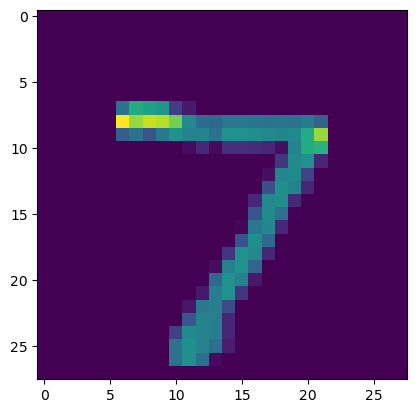

In [130]:
plt.imshow(x_test[0])

In [131]:
print(np.argmax(predictions[128]))

8


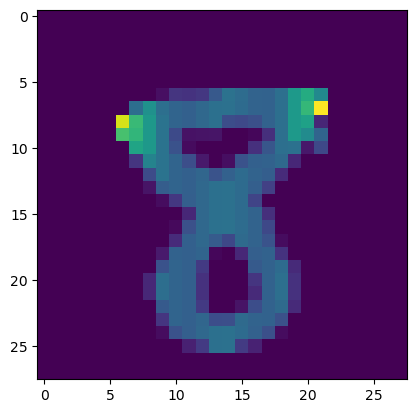

In [132]:
plt.imshow(x_test[128])


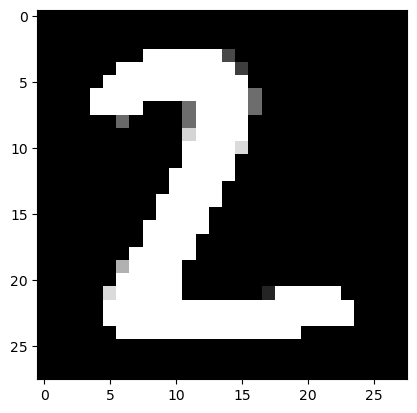

In [162]:
img = cv2.imread('pred_img/2.png')          
plt.imshow(img)

In [163]:
img.shape

(28, 28, 3)

In [164]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(28, 28)

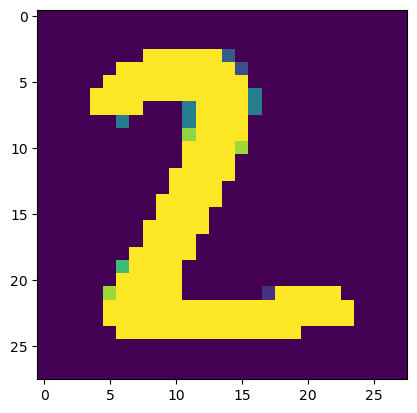

In [165]:
redim_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
redim_img.shape
plt.imshow(redim_img)


In [166]:
norm_img = keras.utils.normalize(redim_img, axis=1)
norm_img = np.array(norm_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
norm_img.shape

(1, 28, 28, 1)

In [167]:
prediction = model.predict(norm_img)
norm_img.shape

1/1 [==============================] - 0s 37ms/step


(1, 28, 28, 1)

In [170]:

print('la prédiction est :', np.argmax(prediction))


la prédiction est : 2
